###Evolutionary game theory
Iheb Belgacem
2A CS 2018/2019

1. Evolutionary Stable Strategies (first approach)

Let's assume we have initially a population of N cooperative ants. Cooperative ants defend their nest if attacked. <br />

A mutation appears, we now have a small number of ants (proportion : x) that refuse to cooperate (that are selfish, that run away if the nest is under attack). <br />
<BR>We want to know how the population mix between cooperative and selfish ants will evolve. (Will the mutation thrive or die out) 
This situation can be modeled by the Prisoner's dilemma with the following payoff Matrix : <br />
<BR>
\begin{pmatrix} 
(2.2) & (0.3) \\
(3.0) & (1.1) 
\end{pmatrix}<br />
<BR>
  The first strategy is cooperate, the second is defect. To model the evolution of the population, we will match for each generation each ant randomly with an other ant. At the end of each cycle, the first N/2 with the highest payoffs will be able to replicate themselves (each will have two children and will die) the other half will die without having any descendant (The payoffs in EGT correspont to the Darwinian fitness ). <br /> We will study the evolution of x after m generations




In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [0]:
#define intial population
def population1(nb,xi):
  return np.concatenate((np.zeros(nb-round(nb*xi),dtype=int),np.ones(round(nb*xi),dtype=int)),axis=0)

In [0]:
#define intial population (with a majority of selfish)
def population2(nb,xi):
  return np.concatenate((np.ones(nb-round(nb*xi),dtype=int),np.zeros(round(nb*xi),dtype=int)),axis=0)

In [0]:
#function that defines pairs of ants that we will match
def matching(n):
  a=np.arange(n)
  b=np.random.permutation(a)
  b=b[0:round(n/2)]
  c=[]
  for i in np.arange(n):
    if (i in b)==False:
      c.append(i)
  d=np.array(c)
  return b,d



In [0]:
#function that defines payoff for each ant of the population
def game(popul,payoffmatrix):
  a1,a2=matching(len(popul))
  po=np.zeros(len(popul),dtype=int)
  for i,j in zip(a1,a2):
    po[i]=po[i]+payoffmatrix[popul[i],popul[j]]
    po[j]=po[j]+payoffmatrix[popul[j],popul[i]]
  return po


In [0]:
#Function that creates new generations
def newgeneration(popu,zz):
  tab=[]
  for i in range(len(popu)):
    if zz[i]==3:
      tab.append(popu[i])
      tab.append(popu[i])
      tab.append(popu[i])
 

    elif zz[i]==2:
      tab.append(popu[i])
      tab.append(popu[i])
    elif zz[i]==1:
      tab.append(popu[i])
  return np.array(tab)


In [0]:
#function that calculate rate of mutants 
def calculr(k):
  return k.sum()/len(k)

Text(0, 0.5, 'rate of the mutants')

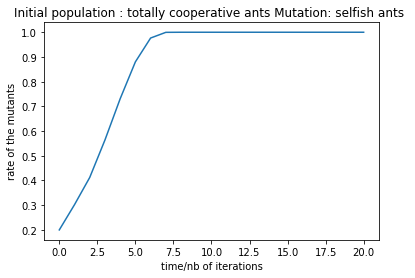

In [0]:
#the payoff matrix will be recorded in a tupel
pm=np.array([[2,0],[3,1]])
N=1000 #Number of total population
x0=0.2 #initial rate of mutants
popu=population1(N,x0)#initial population
times=20
nbgenerations=[0]
rates=[x0]
for i in range(times):
  popu=newgeneration(popu,game(popu,pm))
  rates.append(calculr(popu))
  nbgenerations.append(i+1)
plt.plot(nbgenerations,rates)
plt.title('Initial population : totally cooperative ants Mutation: selfish ants ')
plt.xlabel('time/nb of iterations')
plt.ylabel('rate of the mutants')

According to this model a population that adopt a pure strategy of cooperation is not evolutionary stable, because the mutant strategy is able to invade the initial population
Let's try with a initial population of selfish ants and make the exact same simulation

Text(0, 0.5, 'rate of the mutants')

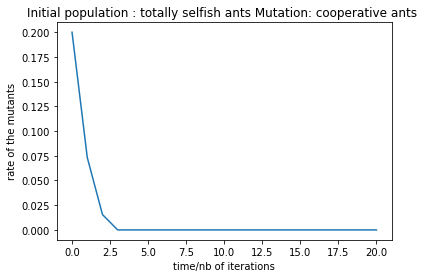

In [0]:
#the payoff matrix will be recorded in a tupel
pm=np.array([[2,0],[3,1]])
N=1000 #Number of total population
x0=0.2 #initial rate of mutants
popu=population2(N,x0)#initial population
times=20
nbgenerations=[0]
rates=[x0]
for i in range(times):
  popu=newgeneration(popu,game(popu,pm))
  rates.append(1-calculr(popu))
  nbgenerations.append(i+1)
plt.plot(nbgenerations,rates)
plt.title('Initial population : totally selfish ants Mutation: cooperative ants ')
plt.xlabel('time/nb of iterations')
plt.ylabel('rate of the mutants')

According to this model a population that adopt a pure strategy of selfishness is  evolutionary stable , because the mutant strategy dies out very quickly



---

##Hawk and Dove
Hove and Dove is a classical example in Evolutionary Game Theory and can be used to simulate many real-world situation, like for example a contest over a sharable ressource. <br/>

In this Game we have two different strategies for our players : 
<br/>

*   '**HAWK**': When a player adopts this strategy, if there is a competition with another animal over a ressource, our player doesn't hesistate to engage in a fight until one of the players surrenders
*   ‘**DOVE**’ On the opposite, Doves avoid conflicts and flee if a opponent wants to engage in a fight

The Payoff Matrix for this game is the following (with strategy 1 representing Hawk , strategy 2 representig Dove): <br/> <br/>
\begin{pmatrix} 
((V-C)/2,(V-C)/2) & (V,0) \\
(0,V) & (V/2,V/2) 
\end{pmatrix}
<br/>
With:


*   V = value of the ressource
*   C = cost of the fight
<br/>
We want to find the Evolutionary stable strategies when V>C and When C>V



In [0]:
#installing a library for Game theory
pip install nashpy

In [0]:
import nashpy as nash
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#First Case : V>C
V=20
C=10
#The payoff Matrix for player 1
A=[[5,20],[0,10]]
#The payoff Matrix for player 2
B=[[5,0],[20,10]]
#Let's find the nash equilibria for our Game because they are the potential ESS 
dh=nash.Game(A,B)
dh


Bi matrix game with payoff matrices:

Row player:
[[ 5 20]
 [ 0 10]]

Column player:
[[ 5  0]
 [20 10]]

In [0]:
eqs=dh.support_enumeration()
for eq in eqs:
  print(eq)

(array([1., 0.]), array([1., 0.]))


The only nash equilibrium is a pure strategy Hawk <br/>

The replicator dynamics equation (that tells us how the frequency of each strategy will evolve is given by ) <br/>
$$dx_{i}/dt(t) = x_{i}(t)*((Ax)_{i}-x^T.A.x)$$  <br/>
with $$x^T*A*x = average~fitness~of~the~population $$
<br/>The replicator Equation rewards strategies that outperform the average
by increasing their frequency, and penalizes poorly perform-
ing strategies by decreasing their frequency.
The Payoff of 

$$dx_{1}/dt(t) = x_{1}(t)*((Ax)_{1}-x^T.A.x)$$ 
$$dx_{2}/dt(t) = x_{2}(t)*((Ax)_{2}-x^T.A.x)$$ 

In [0]:
def dxdt(x,t,A):
  f1=np.dot(A,x) #the expected payoff
  avg=np.dot(x,np.dot(A,x)) #the average fitness of the entire population
  avgv=[avg,avg]
  return x*(f1-avgv)
  

In [0]:
def f(Y,A,t):
    y1, y2 = Y
    avg=np.dot(Y,np.dot(A,Y))
    return [y1*np.dot(np.dot(A,Y),np.array([1,0],dtype=int)),y2*np.dot(np.dot(A,Y),np.array([0,1],dtype=int))]

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


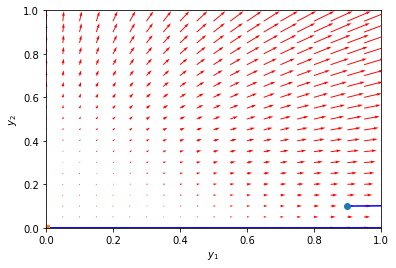

In [0]:
y1 = np.linspace(0,1,21)
y2 = np.linspace(0,1,21)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y],A,t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([0,1])
plt.ylim([0,1])


tspan = np.linspace(0, 50, 100)
ys = odeint(func=f, y0=[0.9,0.1],t=tspan,args=(A,))
plt.plot(ys[:,0], ys[:,1], 'b-') # path
plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

Text(0, 0.5, 'x1,x2=1-x1')

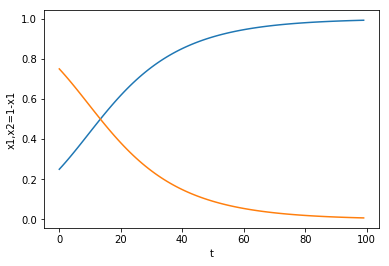

In [0]:
t=np.linspace(0,1,100)
xs=odeint(func=dxdt,y0=[0.25,0.75],t=t,args=(A,))
plt.plot(xs);
plt.xlabel('t')
plt.ylabel('x1,x2=1-x1')

In [0]:
#Second Case : C>V
V=10
C=20
#The payoff Matrix for player 1
A=[[-5,10],[0,5]]
#The payoff Matrix for player 2
B=[[-5,0],[10,5]]
#Let's find the nash equilibria for our Game because they are the potential ESS 
dh=nash.Game(A,B)
dh


Bi matrix game with payoff matrices:

Row player:
[[-5 10]
 [ 0  5]]

Column player:
[[-5  0]
 [10  5]]

In [0]:
eqs=dh.support_enumeration()
for eq in eqs:
  print(eq)

(array([1., 0.]), array([0., 1.]))
(array([0., 1.]), array([1., 0.]))
(array([0.5, 0.5]), array([0.5, 0.5]))


We have 3 candidates for the ESS.

Text(0, 0.5, 'x1,x2=1-x1')

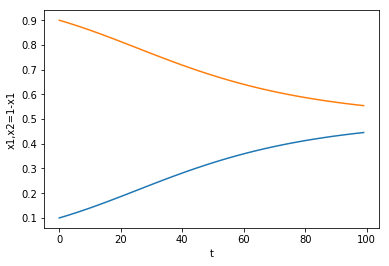

In [0]:
t=np.linspace(0,1,100)
xs=odeint(func=dxdt,y0=[0.1,0.9],t=t,args=(A,))
plt.plot(xs);
plt.xlabel('t')
plt.ylabel('x1,x2=1-x1')

In [0]:
y1 = np.linspace(0,1,11)
y2 = np.linspace(0,1,11)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y],A,t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([0, 1])
plt.ylim([0, 1])


tspan = np.linspace(0, 50, 200)
ys = odeint(func=f, y0=[0.5,0.5],t=tspan,args=(A,))
plt.plot(ys[:,0], ys[:,1], 'b-') # path
plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
